In [8]:
import pandas as pd
players = pd.read_csv('data/clean/cleaned_players.csv')


### Variable Transformation for Height and Weight 

In [9]:
def convert_height_to_cm(height):
    height = int(height)
    return int(height * 2.54)

def convert_weight_to_kg(weight):
    weight = int(weight)
    return int(weight * 0.453592)

players['height'] = players['height'].apply(convert_height_to_cm)
players['weight'] = players['weight'].apply(convert_weight_to_kg)

### Number of player by Height and Weight - Graphs

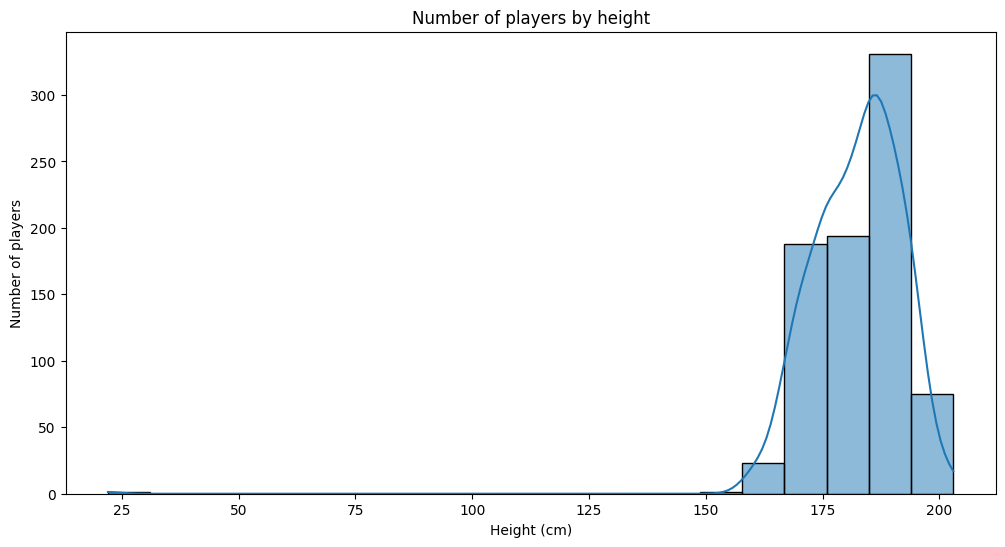

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(players['height'], bins=20, kde=True)
plt.title('Number of players by height')
plt.xlabel('Height (cm)')
plt.ylabel('Number of players')
plt.show()


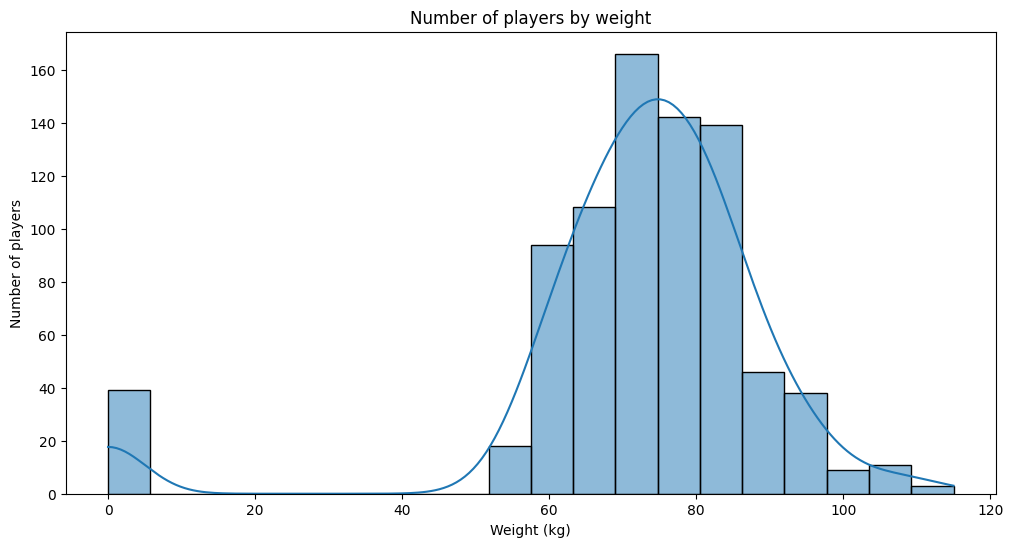

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(players['weight'], bins=20, kde=True)
plt.title('Number of players by weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of players')
plt.show()


### Outliers Handling for Height and Weight

In [ ]:
# Put the Outliers to 0

# Put the height values with <150 cm to 0

players.loc[players['height'] < 150, 'height'] = 0

# Put the weight values with <50 kg to 0

players.loc[players['weight'] < 50, 'weight'] = 0

# Fill the outliers with the average value by position

# Get the average height and weight by position

dict_pos_height = {}
dict_pos_weight = {}
for index, row in players.iterrows():
    if '-' in row['pos']:
        pos = row['pos'].split('-')
        pos1 = pos[0]
        pos2 = pos[1]
        if pos1 not in dict_pos_height:
            dict_pos_height[pos1] = []
            dict_pos_weight[pos1] = []
        if pos2 not in dict_pos_height:
            dict_pos_height[pos2] = []
            dict_pos_weight[pos2] = []
        dict_pos_height[pos1].append(row['height'])
        dict_pos_height[pos2].append(row['height'])
        dict_pos_weight[pos1].append(row['weight'])
        dict_pos_weight[pos2].append(row['weight'])
    else:
        if row['pos'] not in dict_pos_height:
            dict_pos_height[row['pos']] = []
            dict_pos_weight[row['pos']] = []
        dict_pos_height[row['pos']].append(row['height'])
        dict_pos_weight[row['pos']].append(row['weight'])

average_height_by_position = {}

for key in dict_pos_height:
    average_height_by_position[key] = int(sum(dict_pos_height[key]) / len(dict_pos_height[key]))

average_weight_by_position = {}

for key in dict_pos_weight:
    average_weight_by_position[key] = int(sum(dict_pos_weight[key]) / len(dict_pos_weight[key]))


print(average_height_by_position)
print(average_weight_by_position)


# Fill the outliers with the average value by position

for index, row in players.iterrows():
    if row['height'] == 0:
        if '-' in row['pos']:
            pos = row['pos'].split('-')
            pos1 = pos[0]
            pos2 = pos[1]
            players.at[index, 'height'] = int((average_height_by_position[pos1] + average_height_by_position[pos2]) / 2)
        else:
            players.at[index, 'height'] = average_height_by_position[row['pos']]
    if row['weight'] == 0:
        if '-' in row['pos']:
            pos = row['pos'].split('-')
            pos1 = pos[0]
            pos2 = pos[1]
            players.at[index, 'weight'] = int((average_weight_by_position[pos1] + average_weight_by_position[pos2]) / 2)
        else:
            players.at[index, 'weight'] = average_weight_by_position[row['pos']]


{'C': 191, 'F': 185, 'G': 174}
{'C': 79, 'F': 74, 'G': 65}


### Save the data

In [13]:
players.to_csv('data/clean/cleaned_players.csv', index=False)